In [2]:
import pickle

combined = pickle.load(open( "combined_save.p", "rb" ) )
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Columns: 172 entries, ﻿DBN_x to school_dist
dtypes: float64(66), int64(11), object(95)
memory usage: 490.6+ KB


# 1: Analyzing The Data
We cleaned and combined these datasets to get a single dataset, combined, that we're now ready to analyze and visualize.

# 2: Finding Correlations
Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1, and tells you if the two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the more strongly positively correlated the columns are. The closer to -1 the r value is, the more strongly negatively correlated the columns are. The closer to 0 the r value is, the less the columns are correlated.

In general r-values above .25 or below -.25 are enough to qualify a correlation as interesting. An r-value isn't perfect, and doesn't indicate that there is a correlation. It just indicates the possiblity of one. To really assess whether or not a correlation exists, you need to look at the data using a scatterplot, and see the "shape" of the data. 

In [3]:
correlations = combined.corr()
sat_score_corr = correlations.loc['sat_score']
print(sat_score_corr)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
index_x                                 0.035712
﻿CSD_x                                  0.042948
NUMBER OF STUDENTS / SEATS FILLED_x     0.394626
NUMBER OF SECTIONS_x                    0.362673
AVERAGE CLASS SIZE_x                    0.381014
SIZE OF SMALLEST CLASS_x                0.249949
SIZE OF LARGEST CLASS_x                 0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO_x             NaN
index_y                                 0.035712
﻿CSD_y                                  0.042948
NUMBER OF STUDENTS / SEATS FILLED_y     0.394626
NUMBER OF SECTIONS_y                    0.362673
AVERAGE CLASS SIZE_y

# 3: Plotting Enrollment

The numbers above represent the r-value between the sat_score column and the named column. 
Unsurprisingly, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, and sat_score are strongly correlated with sat_score.


In [7]:
sat_score_corr = sat_score_corr[(sat_score_corr > 0.25) | (sat_score_corr < -0.25)]
print(sat_score_corr.sort_values())

frl_percent                            -0.722225
sped_percent                           -0.448170
ell_percent                            -0.398750
hispanic_per                           -0.396985
black_per                              -0.284139
N_t                                     0.291463
saf_t_11                                0.313810
SIZE OF LARGEST CLASS_x                 0.314434
SIZE OF LARGEST CLASS_y                 0.314434
saf_tot_11                              0.318753
Total Cohort                            0.325144
male_num                                0.325520
saf_s_11                                0.337639
aca_s_11                                0.339435
NUMBER OF SECTIONS_x                    0.362673
NUMBER OF SECTIONS_y                    0.362673
total_enrollment                        0.367857
AVERAGE CLASS SIZE_y                    0.381014
AVERAGE CLASS SIZE_x                    0.381014
female_num                              0.388631
NUMBER OF STUDENTS /

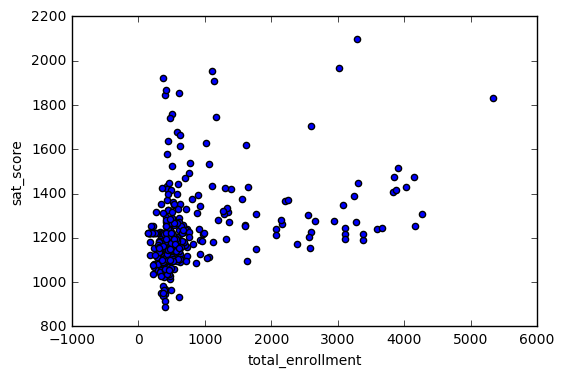

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.show()

# 4: Exploring Schools With Low SAT Scores And Enrollment

In [11]:
low_enrollment = combined[(combined['total_enrollment'] < 1000) & (combined['sat_score'] < 1000)]
print(low_enrollment['School Name'])

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


# 5: Plotting Language Learning Percentage

From our research in the last screen, we found that most of the high schools with low total enrollment and low SAT scores are actually schools with a high percentage of English language learners enrolled. This indicates that it's actually ell_percent that correlates strongly with sat_score instead of total_enrollment.

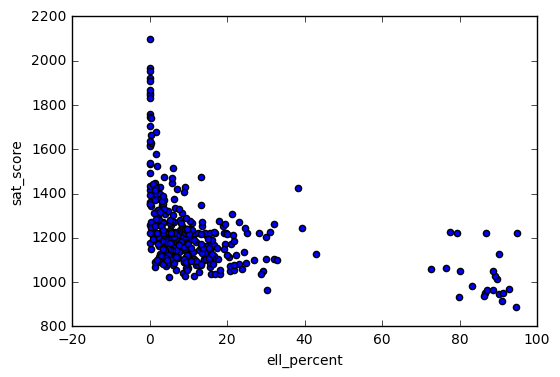

In [12]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.show()

# 6: Mapping The Schools

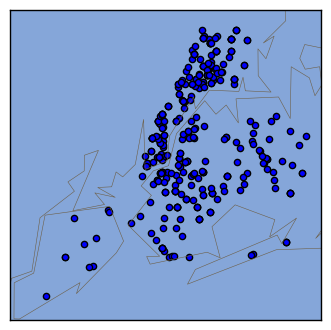

In [18]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

longitudes = combined['lon'].tolist()
latitudes = combined['lat'].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

plt.show()

# 7: Plotting Out Statistics


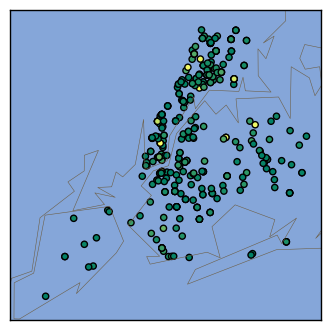

In [19]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

longitudes = combined['lon'].tolist()
latitudes = combined['lat'].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined['ell_percent'], cmap='summer')

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

plt.show()

# 8: Calculating District Level Statistics

In [21]:
import numpy
districts = combined.groupby('school_dist').agg(numpy.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,index_x,...,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,loc1,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,411.940476,...,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,40.719022,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,1744.460500,...,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,40.739699,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3112.208333,...,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,40.781574,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,3840.965079,...,12.0,10029.857143,580.857143,1.142857,0.0,0.0,0.0,40.793449,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,4366.214286,...,12.0,10030.142857,609.857143,1.142857,0.0,0.0,0.0,40.817077,40.817077,-73.949251


# 9: Plotting Ell_percent By District

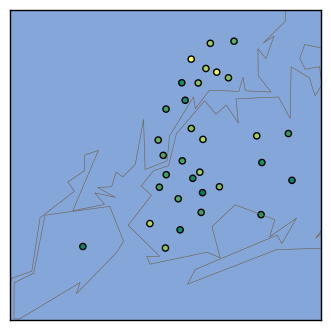

In [23]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

longitudes = districts['lon'].tolist()
latitudes = districts['lat'].tolist()
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=districts['ell_percent'], cmap='summer')

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

plt.show()